In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
X = pd.read_csv('X_movies')
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,2.370000e+08,7.9,4834.0
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,4.045539e+07,7.1,143.0
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,3.000000e+08,7.1,48350.0
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,2.450000e+08,6.8,11700.0
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,2.500000e+08,8.5,106759.0


In [107]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [4]:
X.corr()

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes
production_budget,1.000000,0.207884,0.077459,0.276407,0.185357,0.033154,0.236820
title_year,0.207884,1.000000,0.130532,-0.137662,0.048664,-0.178685,0.124693
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.011340,0.037765,0.020656
duration.1,0.276407,-0.137662,-0.012645,1.000000,0.064252,0.315642,0.121918
budget,0.185357,0.048664,0.011340,0.064252,1.000000,0.019417,0.032591
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.019417,1.000000,0.096663
facebook_likes,0.236820,0.124693,0.020656,0.121918,0.032591,0.096663,1.000000


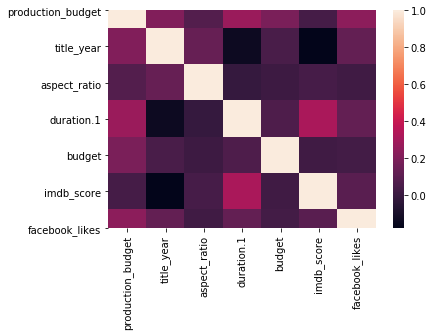

In [5]:
sns.heatmap(X.corr())

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.578943792477098e+18, tolerance: 9138637397423322.0
  positive)


0.5575233984749932

In [9]:
model.coef_

array([ 3.11709090e+00, -1.05859830e+05, -6.11042714e+06, -1.61602743e+04,
       -9.73933688e-03,  2.73006749e+07,  1.73158142e+02])

In [10]:
var = np.floor(np.log10(np.abs(model.coef_)))

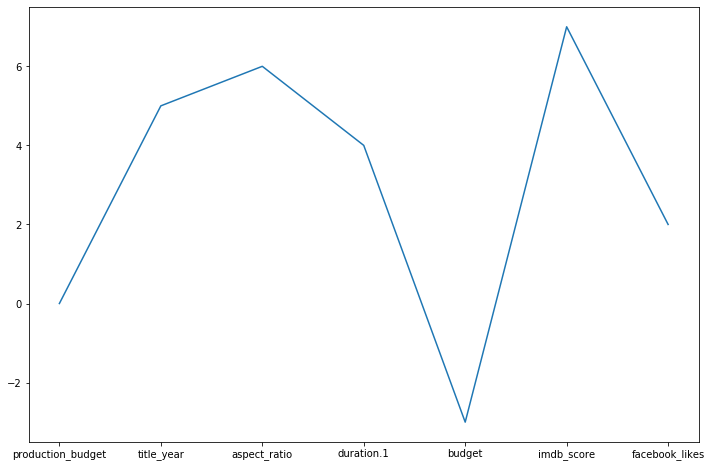

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns));

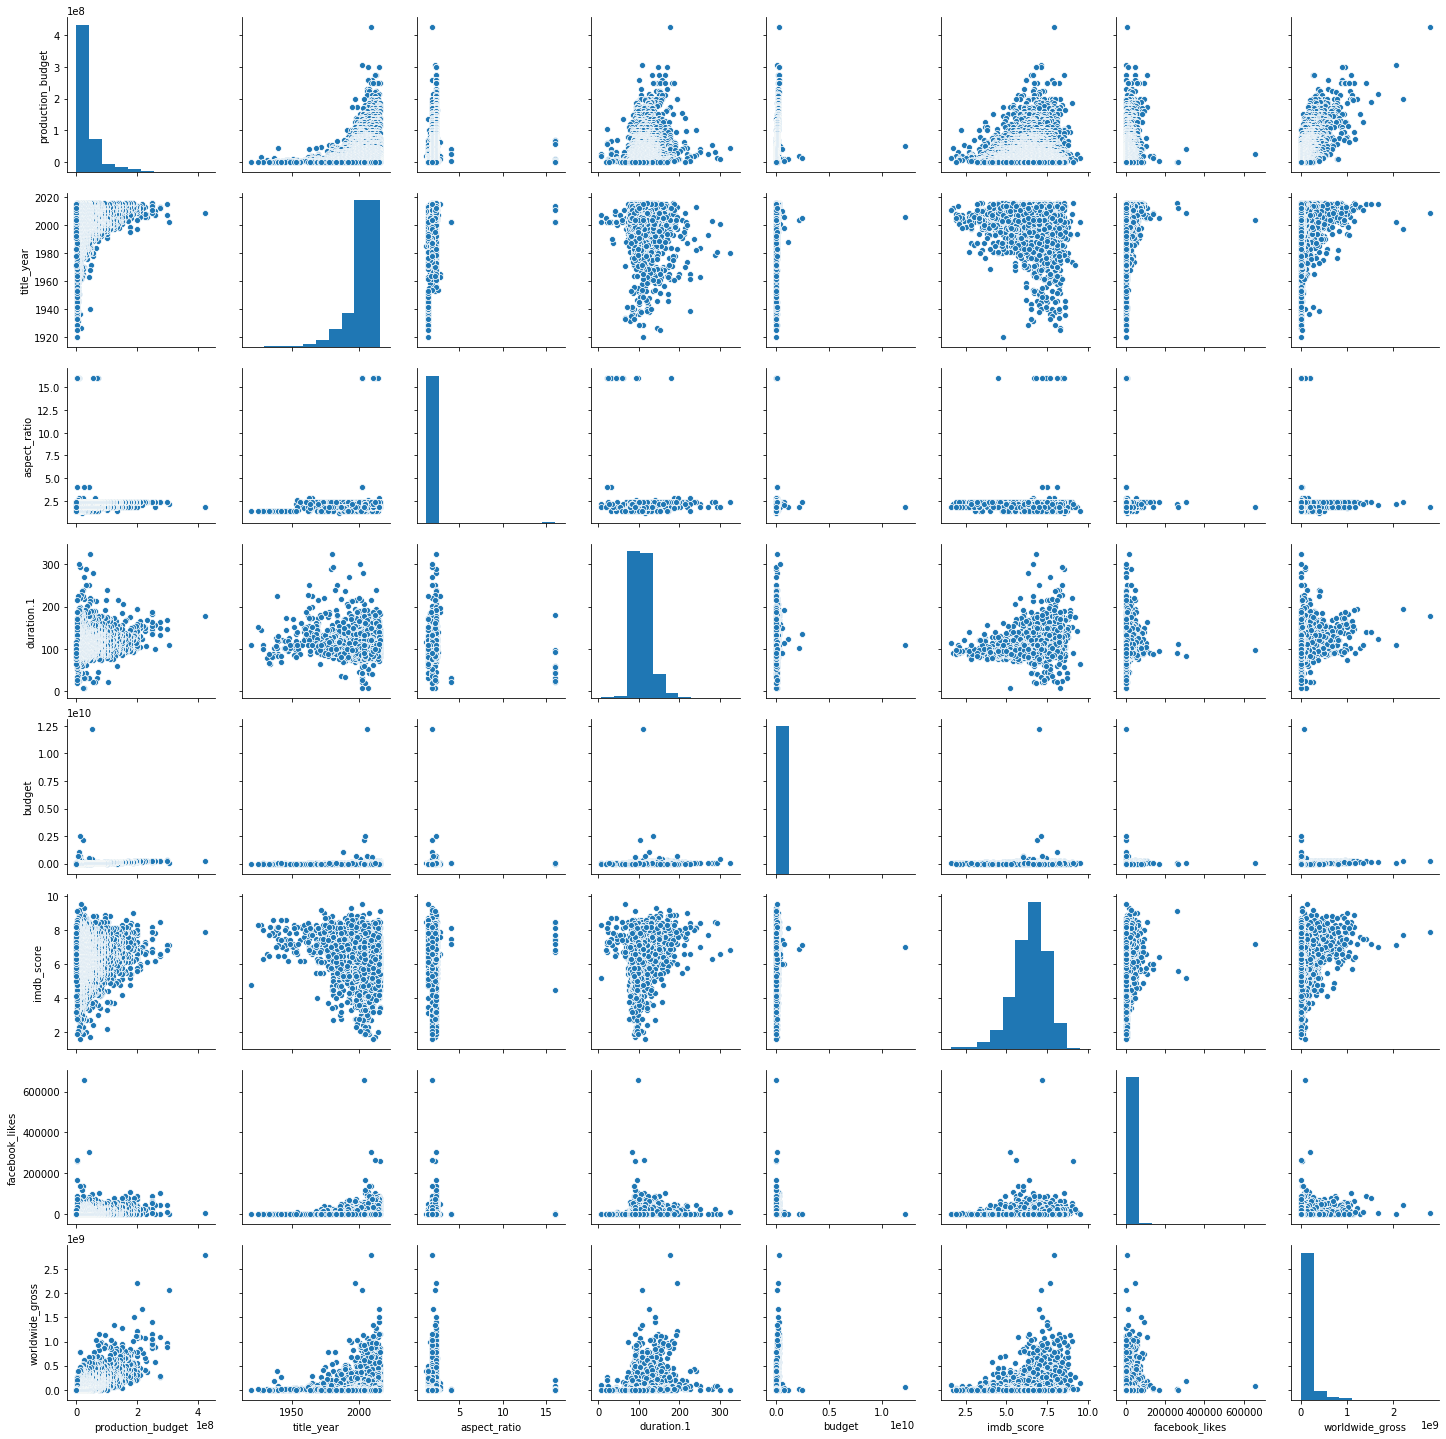

In [12]:
z = pd.concat([X, y], axis= 1)
sns.pairplot(z)

In [13]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
clase

0       7
1       5
2       5
3       5
4       5
       ..
4099    0
4100    0
4101    0
4102    0
4103    0
Name: class, Length: 4104, dtype: int8

In [14]:
z2 = pd.concat([X,clase], axis=1)
z2.head()

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,facebook_likes,class
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,4834.0,7
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,143.0,5
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,48350.0,5
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,11700.0,5
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,106759.0,5


C:\Users\luife\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\luife\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\luife\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\luife\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


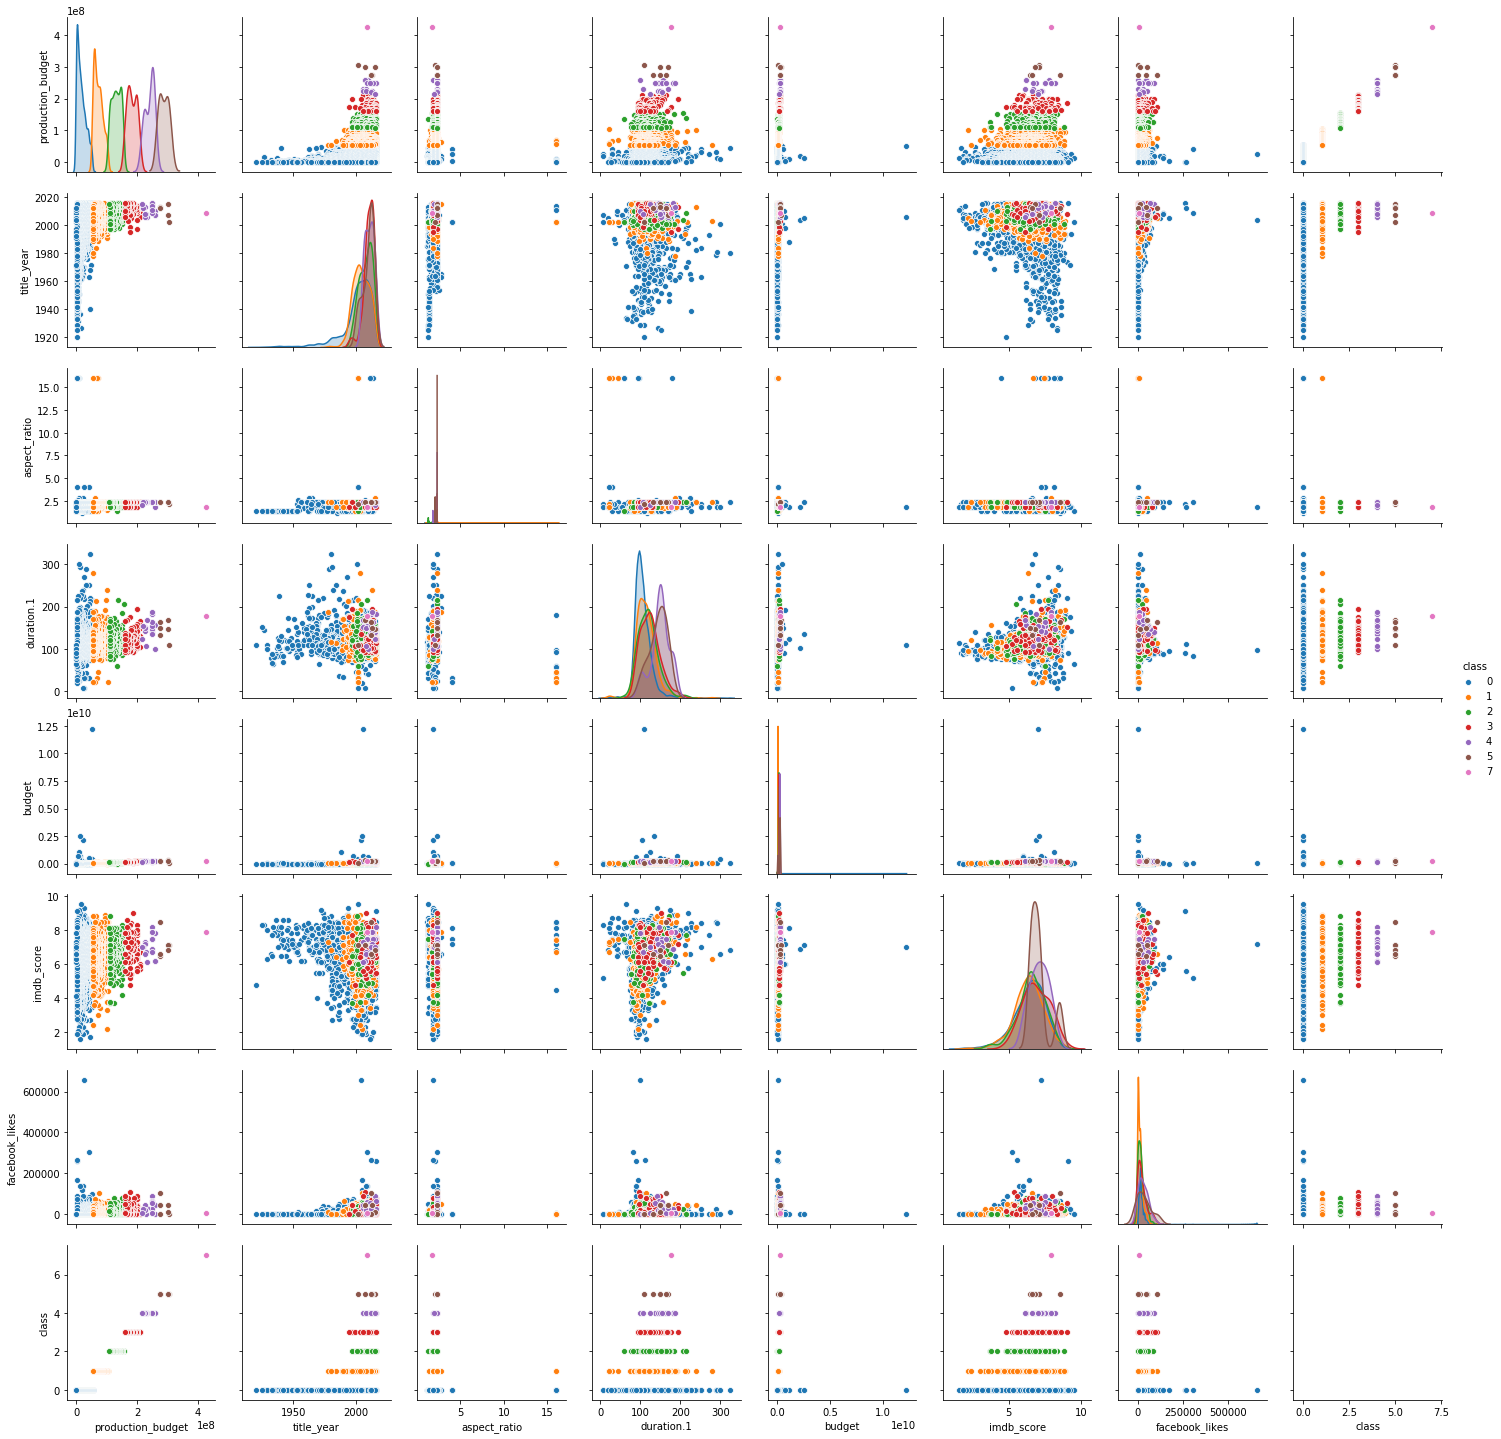

In [15]:
sns.pairplot(z2, hue='class')

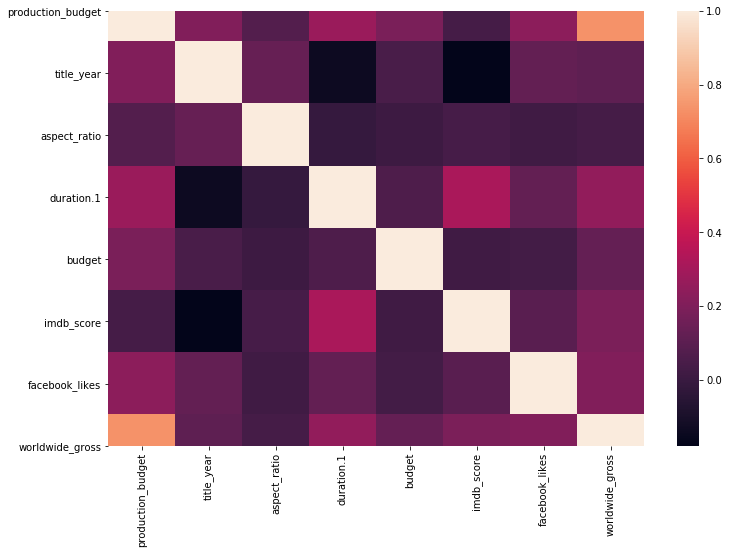

In [16]:
sns.heatmap(z.corr())

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [18]:
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)
scores= selector.scores_
scores

array([0.42990585, 0.06414767, 0.07452678, 0.0697196 , 0.37897817,
       0.04873847, 0.11783401])

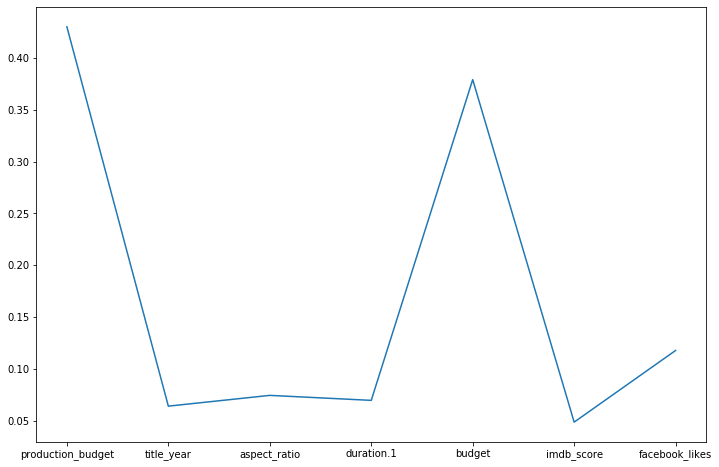

In [19]:
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns));

In [20]:
X2 = X[['production_budget', 'imdb_score']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X2, y)

In [22]:
model = Lasso().fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.221341460530903e+18, tolerance: 9319420352077886.0
  positive)


0.5659341003755991

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
scaler.transform(X_train)

array([[-0.786572  ,  0.13018925],
       [-0.546126  ,  0.69765094],
       [ 0.53342746,  1.45426651],
       ...,
       [-0.32530825,  1.26511262],
       [-0.3130406 , -1.66677274],
       [-0.30077294, -0.34269548]])

In [26]:
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

In [27]:
model = Lasso()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.5659341001826758

In [28]:
from sklearn.pipeline import make_pipeline

In [29]:
model_scaled = make_pipeline(StandardScaler(),
                             Lasso())
model_scaled.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [30]:
model_scaled.score(X_test, y_test)

0.5659341001826758

In [31]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [34]:
X.shape

(4104, 7)

In [35]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(X).shape

(4104, 36)

In [42]:
model_poly = make_pipeline(StandardScaler(),
                           PolynomialFeatures(2),
                           Lasso())
model_poly.fit(X_train, y_train)
model_poly.score(X_test, y_test)

0.620921724872502

In [49]:
df = pd.read_csv('/Users/luife/datasets/platzi/peliculas.csv', usecols= ['actor_1_name','director_name', ])

In [50]:
df

,director_name,actor_1_name
0,James Cameron,CCH Pounder
1,Gore Verbinski,Johnny Depp
2,Sam Mendes,Christoph Waltz
3,Christopher Nolan,Tom Hardy
4,Doug Walker,Doug Walker
...,...,...
5038,Scott Smith,Eric Mabius
5039,NaN,Natalie Zea
5040,Benjamin Roberds,Eva Boehnke
5041,Daniel Hsia,Alan Ruck


In [52]:
X3 = pd.concat([X2, df], axis=1)
X3.head()

,production_budget,imdb_score,director_name,actor_1_name
0,425000000.0,7.9,James Cameron,CCH Pounder
1,306000000.0,7.1,Gore Verbinski,Johnny Depp
2,300000000.0,7.1,Sam Mendes,Christoph Waltz
3,300000000.0,6.8,Christopher Nolan,Tom Hardy
4,275000000.0,8.5,Doug Walker,Doug Walker


In [53]:
X3.shape

(5043, 4)

In [69]:
X4 = pd.concat([X3, y], axis=1)

In [70]:
X4.dropna(inplace =True)

In [71]:
X4.shape

(4018, 5)

In [76]:
y = X4['worldwide_gross']
X = X4[['production_budget', 'imdb_score','actor_1_name', 'director_name']]

In [59]:
import category_encoders as ce

In [77]:
encoder = ce.BinaryEncoder(cols=['actor_1_name', 'director_name'])
X_binenc = encoder.fit_transform(X)
X_binenc.shape

(4018, 26)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_binenc, y)

In [79]:
X_train

,production_budget,imdb_score,actor_1_name_0,actor_1_name_1,actor_1_name_2,actor_1_name_3,actor_1_name_4,actor_1_name_5,actor_1_name_6,actor_1_name_7,...,director_name_2,director_name_3,director_name_4,director_name_5,director_name_6,director_name_7,director_name_8,director_name_9,director_name_10,director_name_11
663,60000000.0,5.4,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2061,20000000.0,2.8,0,0,0,0,1,0,1,0,...,1,1,0,1,1,0,0,0,0,1
3874,850000.0,7.3,0,0,0,0,1,0,1,0,...,1,1,1,0,1,1,1,1,0,0
3736,1500000.0,6.5,0,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
1648,26000000.0,7.2,0,0,0,0,1,1,0,0,...,1,0,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,155000000.0,6.6,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
3319,4600000.0,5.4,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1083,40000000.0,7.2,0,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,1,1
2148,18000000.0,3.9,0,0,1,1,0,0,1,0,...,1,1,0,1,1,1,1,1,1,1


In [91]:
model_pol_encoder = make_pipeline(StandardScaler(),
                                  PolynomialFeatures(2),
                                 Lasso())
model_pol_encoder.fit(X_train, y_train)
model_pol_encoder.score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5551972785879372e+19, tolerance: 8407802078583138.0
  positive)


0.6680313811074612

In [87]:
model = Lasso().fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.292371548512537e+18, tolerance: 8407802078583138.0
  positive)


0.5866099732468637

In [112]:
df = pd.read_csv('/Users/luife/datasets/platzi/X_opening.csv')

In [113]:
y = df['worldwide_gross']
X = df.drop('worldwide_gross', axis=1)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [137]:
model = Lasso().fit(X_train, y_train)
model.score(X_test, y_test)

0.7186632457851054

In [138]:
model_pol_encoder = make_pipeline(StandardScaler(),
                                  PolynomialFeatures(2),
                                 Lasso())
model_pol_encoder.fit(X_train, y_train)
model_pol_encoder.score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.506718026528262e+18, tolerance: 6223459849831639.0
  positive)


0.7677620523536829

In [254]:
from sklearn.model_selection import cross_val_score

In [139]:
scores = cross_val_score(Lasso(), X, y, cv=5, scoring='r2')
scores

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [255]:
from sklearn.model_selection import cross_validate

In [141]:
results = cross_validate(Lasso(), X, y, return_train_score=True, cv=5)
results

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


{'fit_time': array([0.00697136, 0.02945447, 0.03291059, 0.03013372, 0.01790571]),
 'score_time': array([0.00099778, 0.00199533, 0.        , 0.00098681, 0.00800848]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [142]:
test_score= results['test_score']
train_scores = results['train_score']

test_score.mean(), train_scores.mean()

(0.44964021745791777, 0.7491178363039036)

In [143]:
from sklearn.neighbors import KNeighborsRegressor

In [146]:
cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5, return_train_score=True)

{'fit_time': array([0.00199556, 0.00197005, 0.00201941, 0.00299287, 0.        ]),
 'score_time': array([0.00366187, 0.00402379, 0.00396085, 0.0039866 , 0.        ]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ]),
 'train_score': array([0.67830521, 0.76365722, 0.76231726, 0.75701303, 0.75061953])}

In [147]:
from sklearn.model_selection import validation_curve

In [148]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [149]:
train_score, test_score = validation_curve(KNeighborsRegressor(),
                                           X, y,
                                           param_name='n_neighbors',
                                           param_range=n,
                                           cv=5)

In [155]:
np.mean(train_score, axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

In [156]:
np.mean(test_score, axis=1)

array([0.22512929, 0.28769536, 0.30997667, 0.30096812, 0.2942452 ,
       0.28546241, 0.2764644 , 0.25966154, 0.26330528, 0.260925  ,
       0.25715253, 0.25390761, 0.24961489, 0.22845364, 0.21775164,
       0.21797522, 0.21562522, 0.21244327, 0.21070935, 0.2055154 ,
       0.20153511, 0.19756326, 0.19453065, 0.19169794])

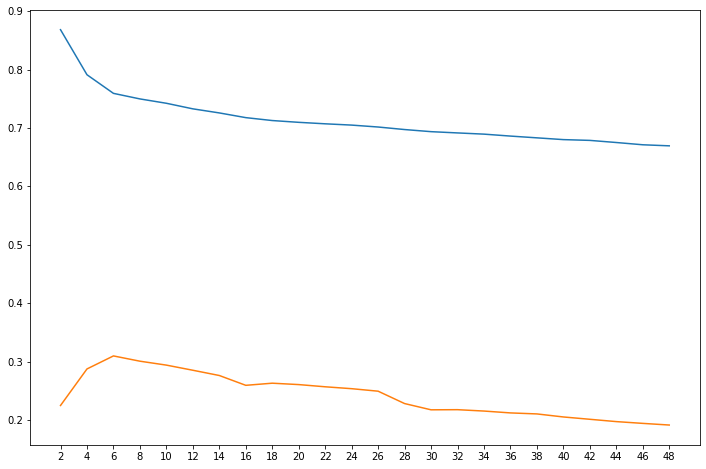

In [160]:
plt.plot(np.mean(train_score, axis=1))
plt.plot(np.mean(test_score, axis=1))
plt.xticks(np.arange(24), n);

In [161]:
from sklearn.model_selection import learning_curve

In [162]:
learning_curve(KNeighborsRegressor(n_neighbors=6), X, y, cv=5)

(array([ 177,  577,  976, 1376, 1776]),
 array([[0.73137814, 0.54347388, 0.54347388, 0.54347388, 0.54347388],
        [0.7172216 , 0.6874683 , 0.67612525, 0.67612525, 0.67612525],
        [0.72048185, 0.74489894, 0.7303819 , 0.7216836 , 0.7216836 ],
        [0.71867144, 0.76263478, 0.7569267 , 0.74900356, 0.74853204],
        [0.71882872, 0.77524359, 0.77285199, 0.76729186, 0.76245665]]),
 array([[ 3.33418389e-01, -1.59695814e+00, -8.82111210e+00,
         -1.86782000e+01, -2.29247727e+01],
        [ 3.54518984e-01,  5.82744244e-01,  2.74286697e-01,
         -2.09063033e-01, -1.90604803e-01],
        [ 3.53902555e-01,  5.94866605e-01,  1.62689828e-01,
         -3.52114650e-01, -3.12381914e-01],
        [ 3.53902555e-01,  5.92497990e-01,  1.60518983e-01,
          6.23338761e-02, -2.06197589e-02],
        [ 3.52641569e-01,  5.98627520e-01,  2.06512855e-01,
          1.45302738e-01,  2.29903192e-01]]))

In [163]:
samples, train, test = learning_curve(KNeighborsRegressor(n_neighbors=6), X, y, cv=5)

In [164]:
samples

array([ 177,  577,  976, 1376, 1776])

In [165]:
train

array([[0.73137814, 0.54347388, 0.54347388, 0.54347388, 0.54347388],
       [0.7172216 , 0.6874683 , 0.67612525, 0.67612525, 0.67612525],
       [0.72048185, 0.74489894, 0.7303819 , 0.7216836 , 0.7216836 ],
       [0.71867144, 0.76263478, 0.7569267 , 0.74900356, 0.74853204],
       [0.71882872, 0.77524359, 0.77285199, 0.76729186, 0.76245665]])

In [166]:
test

array([[ 3.33418389e-01, -1.59695814e+00, -8.82111210e+00,
        -1.86782000e+01, -2.29247727e+01],
       [ 3.54518984e-01,  5.82744244e-01,  2.74286697e-01,
        -2.09063033e-01, -1.90604803e-01],
       [ 3.53902555e-01,  5.94866605e-01,  1.62689828e-01,
        -3.52114650e-01, -3.12381914e-01],
       [ 3.53902555e-01,  5.92497990e-01,  1.60518983e-01,
         6.23338761e-02, -2.06197589e-02],
       [ 3.52641569e-01,  5.98627520e-01,  2.06512855e-01,
         1.45302738e-01,  2.29903192e-01]])

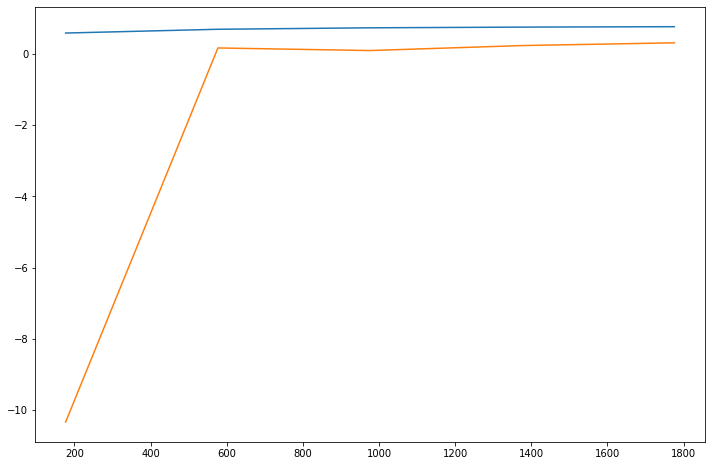

In [168]:
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))

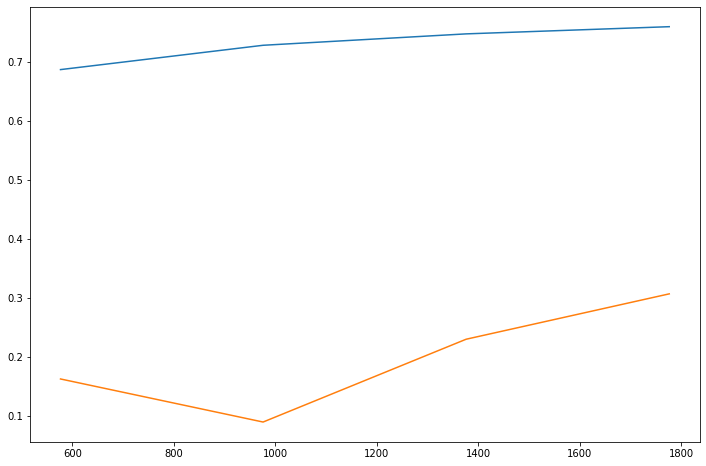

In [169]:
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
plt.plot(samples[1:], np.mean(test, axis=1)[1:])

In [170]:
from sklearn.tree import DecisionTreeRegressor

In [171]:
model = DecisionTreeRegressor(max_depth=2)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [216]:
model.score(X_test, y_test)

0.7484007416446925

In [217]:
Lasso().fit(X_train,y_train).score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.507744725186646e+18, tolerance: 7017016217881035.0
  positive)


0.8144427743938498

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [226]:
forest = RandomForestRegressor(200)
results = cross_validate(forest, X, y, cv=5, scoring='r2',return_train_score=True )

In [227]:
test_scores = results['test_score']
train_scores = results['train_score']

np.mean(train_scores), np.mean(test_scores)

(0.964855383164488, 0.5257419219551667)

In [229]:
from sklearn.ensemble import GradientBoostingRegressor

In [230]:
ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, X, y, cv=5, scoring='r2', return_train_score=True)

In [231]:
test_scores = results['test_score']
train_scores = results['train_score']

np.mean(train_scores), np.mean(test_scores)

(0.9151392143549633, 0.5241153194447312)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
param_test1 = {
    'n_estimators':range(20, 501, 20)
}

In [236]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                      min_samples_split= 500, 
                                      min_samples_leaf= 50,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)

In [237]:
gsearch1 = GridSearchCV(estimator, 
                        param_grid = param_test1,
                        scoring = 'r2',
                        cv=5)

In [238]:
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [243]:
 gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 300}, 0.755637954813014)

In [244]:
gsearch1.cv_results_

{'mean_fit_time': array([0.0112391 , 0.02015347, 0.02655749, 0.03498855, 0.04341297,
        0.05126534, 0.05952563, 0.06863298, 0.08533578, 0.08637838,
        0.09145727, 0.10075874, 0.10833445, 0.11972699, 0.12499552,
        0.13512378, 0.14308796, 0.14619031, 0.15442958, 0.16197309,
        0.1700902 , 0.17819324, 0.18609638, 0.19500685, 0.2048574 ]),
 'std_fit_time': array([1.62693196e-03, 1.94434936e-03, 4.61575276e-04, 3.98433174e-04,
        3.83676950e-04, 4.81191580e-04, 1.27241115e-03, 3.37229744e-03,
        1.08250511e-02, 2.47296292e-03, 7.45530125e-04, 6.36608491e-04,
        4.59206825e-04, 4.73082656e-03, 6.59797562e-05, 1.58061996e-03,
        1.70706792e-03, 5.66530579e-04, 3.76848409e-04, 4.79064982e-05,
        1.74502987e-04, 7.54617870e-04, 1.79276846e-04, 7.17705188e-04,
        2.49704761e-03]),
 'mean_score_time': array([0.00120358, 0.00098968, 0.00099816, 0.00099559, 0.00111256,
        0.00099998, 0.00141168, 0.00178576, 0.00140195, 0.00139637,
        0.00

In [246]:
gsearch1.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [249]:
results = cross_validate(gsearch1.best_estimator_, X_train, y_train, return_train_score=True)
test_scores = results['test_score']
train_scores = results['train_score']

np.mean(train_scores), np.mean(test_scores)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.8200618488962451, 0.7436600449293783)

In [251]:
estimator =  gsearch1.best_estimator_

In [252]:
estimator.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [253]:
estimator.score(X_test, y_test)

0.806780676986018

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
df = pd.read_csv('/Users/luife/datasets/platzi/X_opening.csv')
df.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 10 columns):
production_budget            2221 non-null float64
worldwide_gross              2221 non-null float64
title_year                   2221 non-null float64
aspect_ratio                 2221 non-null float64
duration.1                   2221 non-null float64
cast_total_facebook_likes    2221 non-null float64
budget                       2221 non-null float64
imdb_score                   2221 non-null float64
opening_gross                2221 non-null float64
screens                      2221 non-null float64
dtypes: float64(10)
memory usage: 173.6 KB


In [259]:
df.corr()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
production_budget,1.000000,0.733616,0.152893,0.161617,0.324854,0.185496,0.651859,0.145927,0.676427,0.512074
worldwide_gross,0.733616,1.000000,0.168501,0.078240,0.293716,0.177957,0.476828,0.278984,0.823953,0.446747
title_year,0.152893,0.168501,1.000000,0.198549,0.015875,0.092639,0.088555,0.085859,0.188318,0.197856
aspect_ratio,0.161617,0.078240,0.198549,1.000000,0.233712,0.060679,0.095400,0.133128,0.092245,0.074468
duration.1,0.324854,0.293716,0.015875,0.233712,1.000000,0.116032,0.220324,0.423912,0.211861,-0.044377
cast_total_facebook_likes,0.185496,0.177957,0.092639,0.060679,0.116032,1.000000,0.116032,0.137695,0.204122,0.125018
budget,0.651859,0.476828,0.088555,0.095400,0.220324,0.116032,1.000000,0.109624,0.446085,0.306713
imdb_score,0.145927,0.278984,0.085859,0.133128,0.423912,0.137695,0.109624,1.000000,0.146310,-0.149424
opening_gross,0.676427,0.823953,0.188318,0.092245,0.211861,0.204122,0.446085,0.146310,1.000000,0.606952
screens,0.512074,0.446747,0.197856,0.074468,-0.044377,0.125018,0.306713,-0.149424,0.606952,1.000000


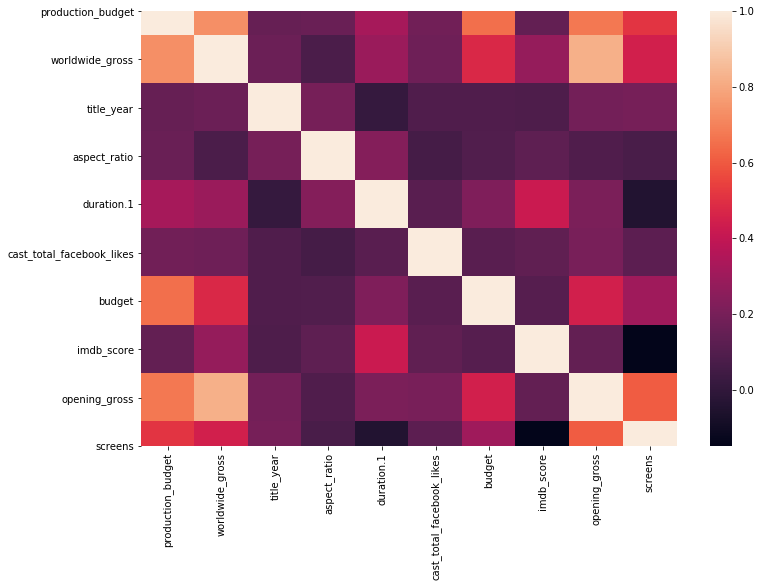

In [260]:
sns.heatmap(df.corr())

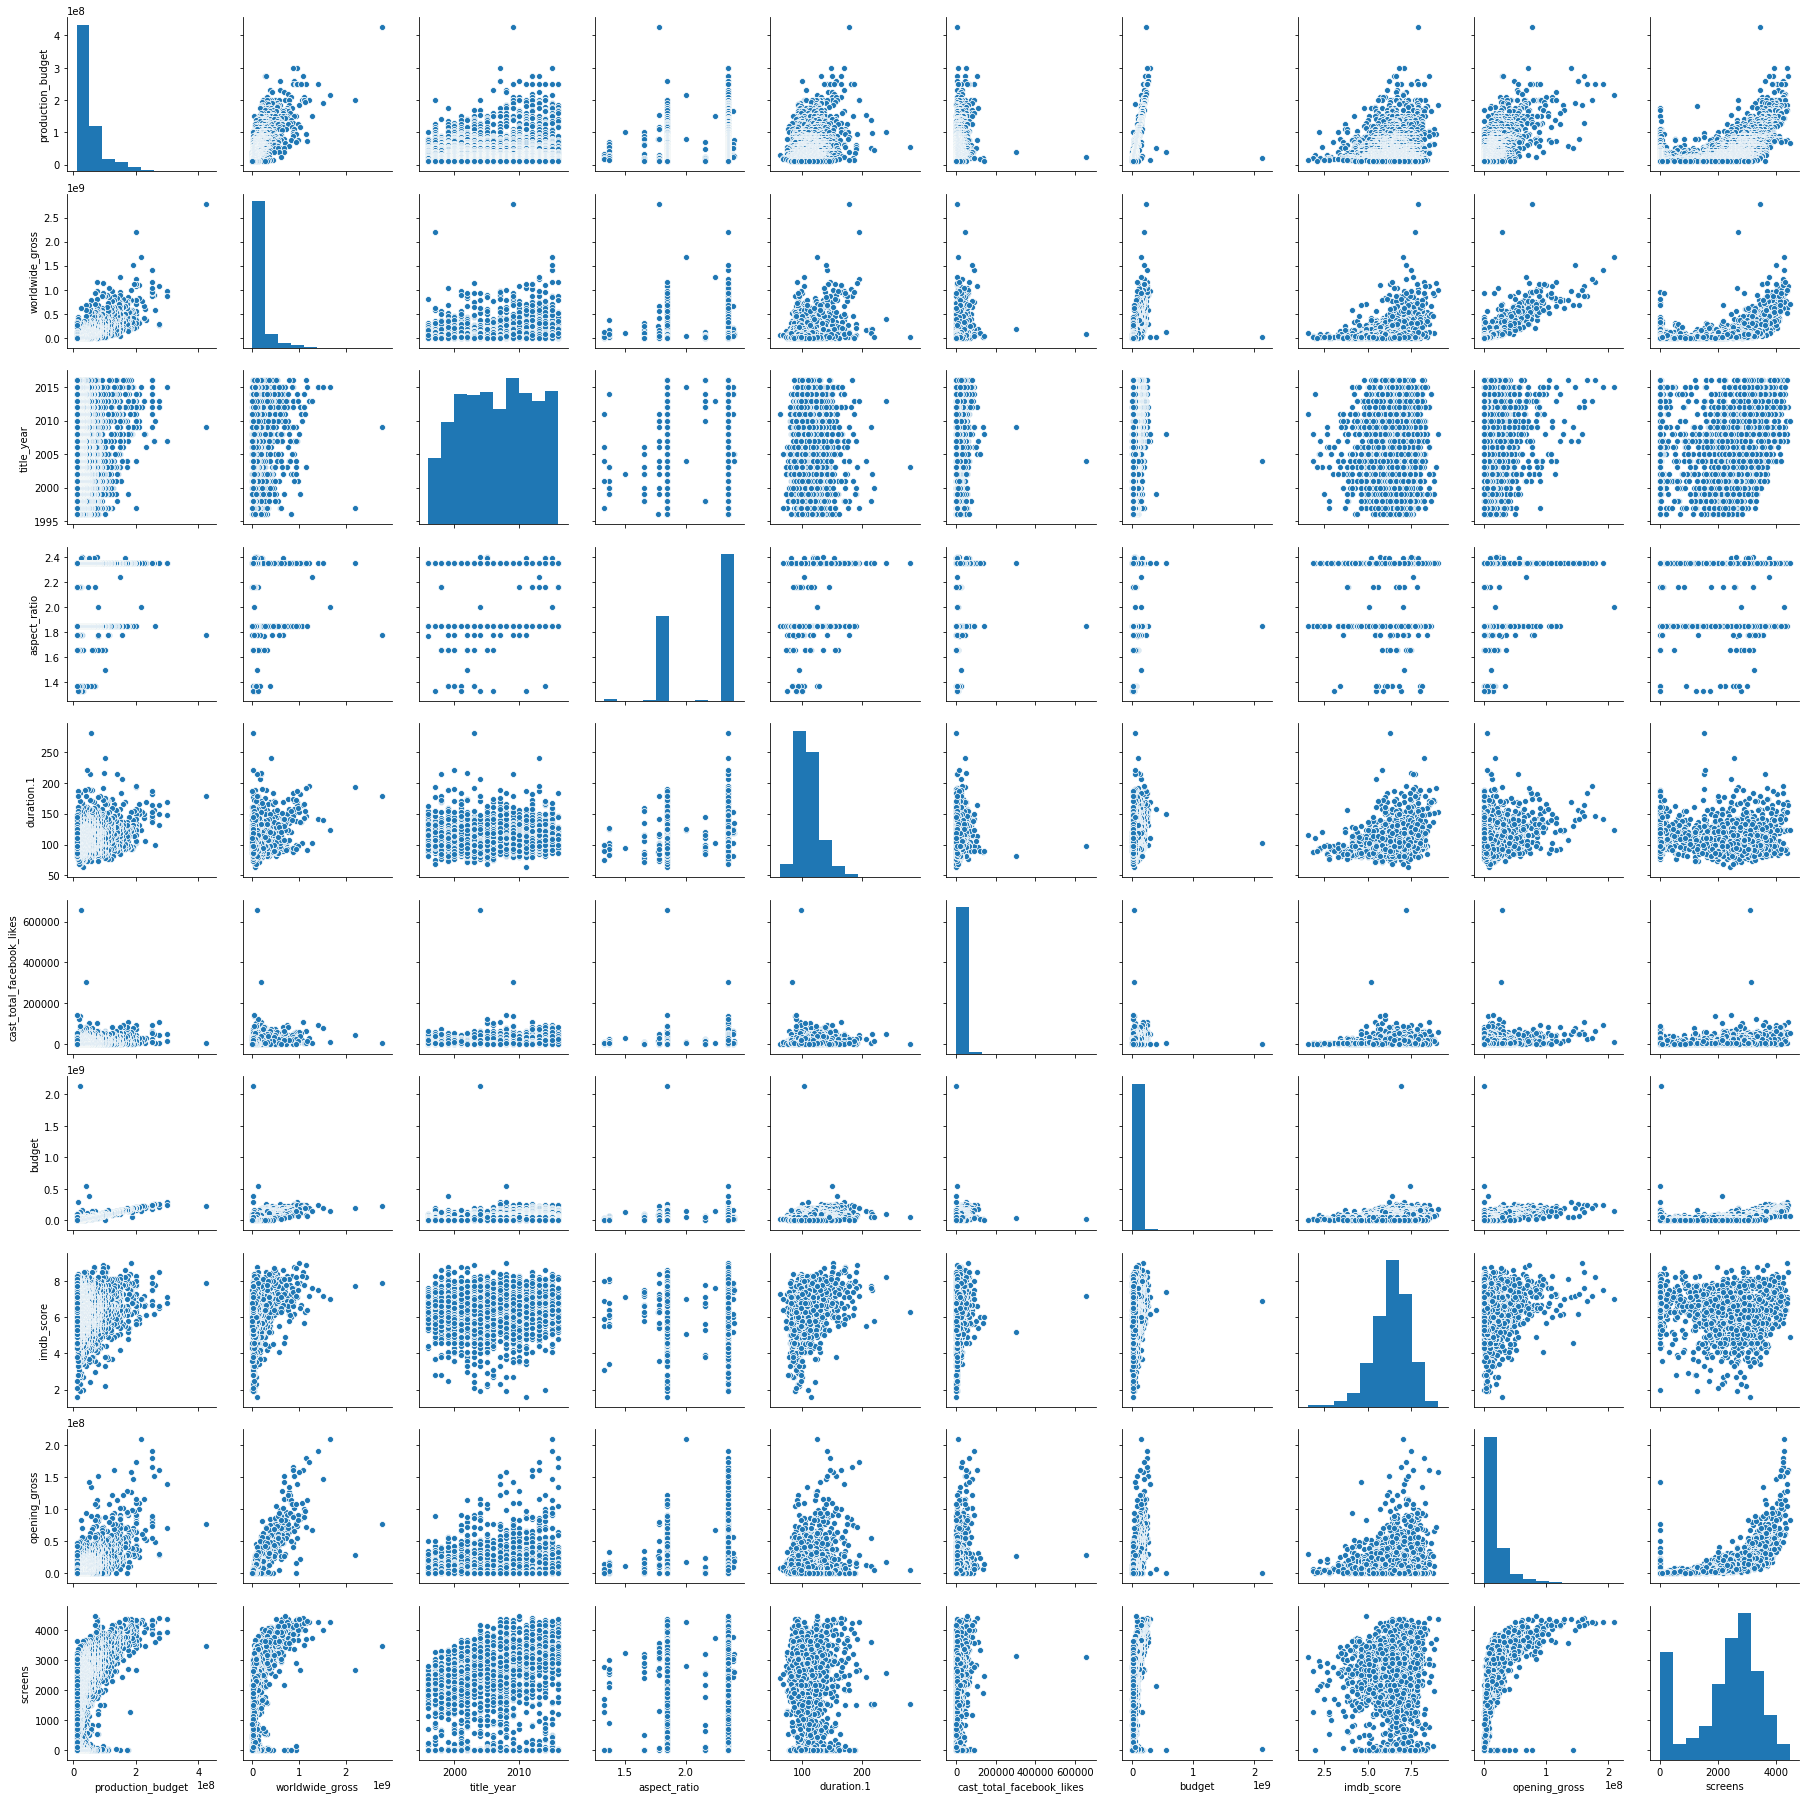

In [263]:
sns.pairplot(df)

In [265]:
y = df['worldwide_gross']
X = df.drop('worldwide_gross', axis=1)

In [266]:
X.corr()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
production_budget,1.000000,0.152893,0.161617,0.324854,0.185496,0.651859,0.145927,0.676427,0.512074
title_year,0.152893,1.000000,0.198549,0.015875,0.092639,0.088555,0.085859,0.188318,0.197856
aspect_ratio,0.161617,0.198549,1.000000,0.233712,0.060679,0.095400,0.133128,0.092245,0.074468
duration.1,0.324854,0.015875,0.233712,1.000000,0.116032,0.220324,0.423912,0.211861,-0.044377
cast_total_facebook_likes,0.185496,0.092639,0.060679,0.116032,1.000000,0.116032,0.137695,0.204122,0.125018
budget,0.651859,0.088555,0.095400,0.220324,0.116032,1.000000,0.109624,0.446085,0.306713
imdb_score,0.145927,0.085859,0.133128,0.423912,0.137695,0.109624,1.000000,0.146310,-0.149424
opening_gross,0.676427,0.188318,0.092245,0.211861,0.204122,0.446085,0.146310,1.000000,0.606952
screens,0.512074,0.197856,0.074468,-0.044377,0.125018,0.306713,-0.149424,0.606952,1.000000


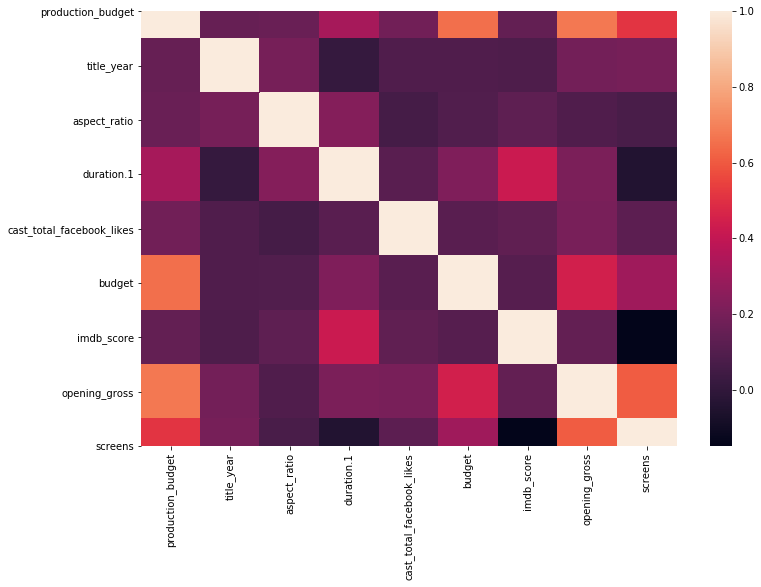

In [267]:
sns.heatmap(X.corr())

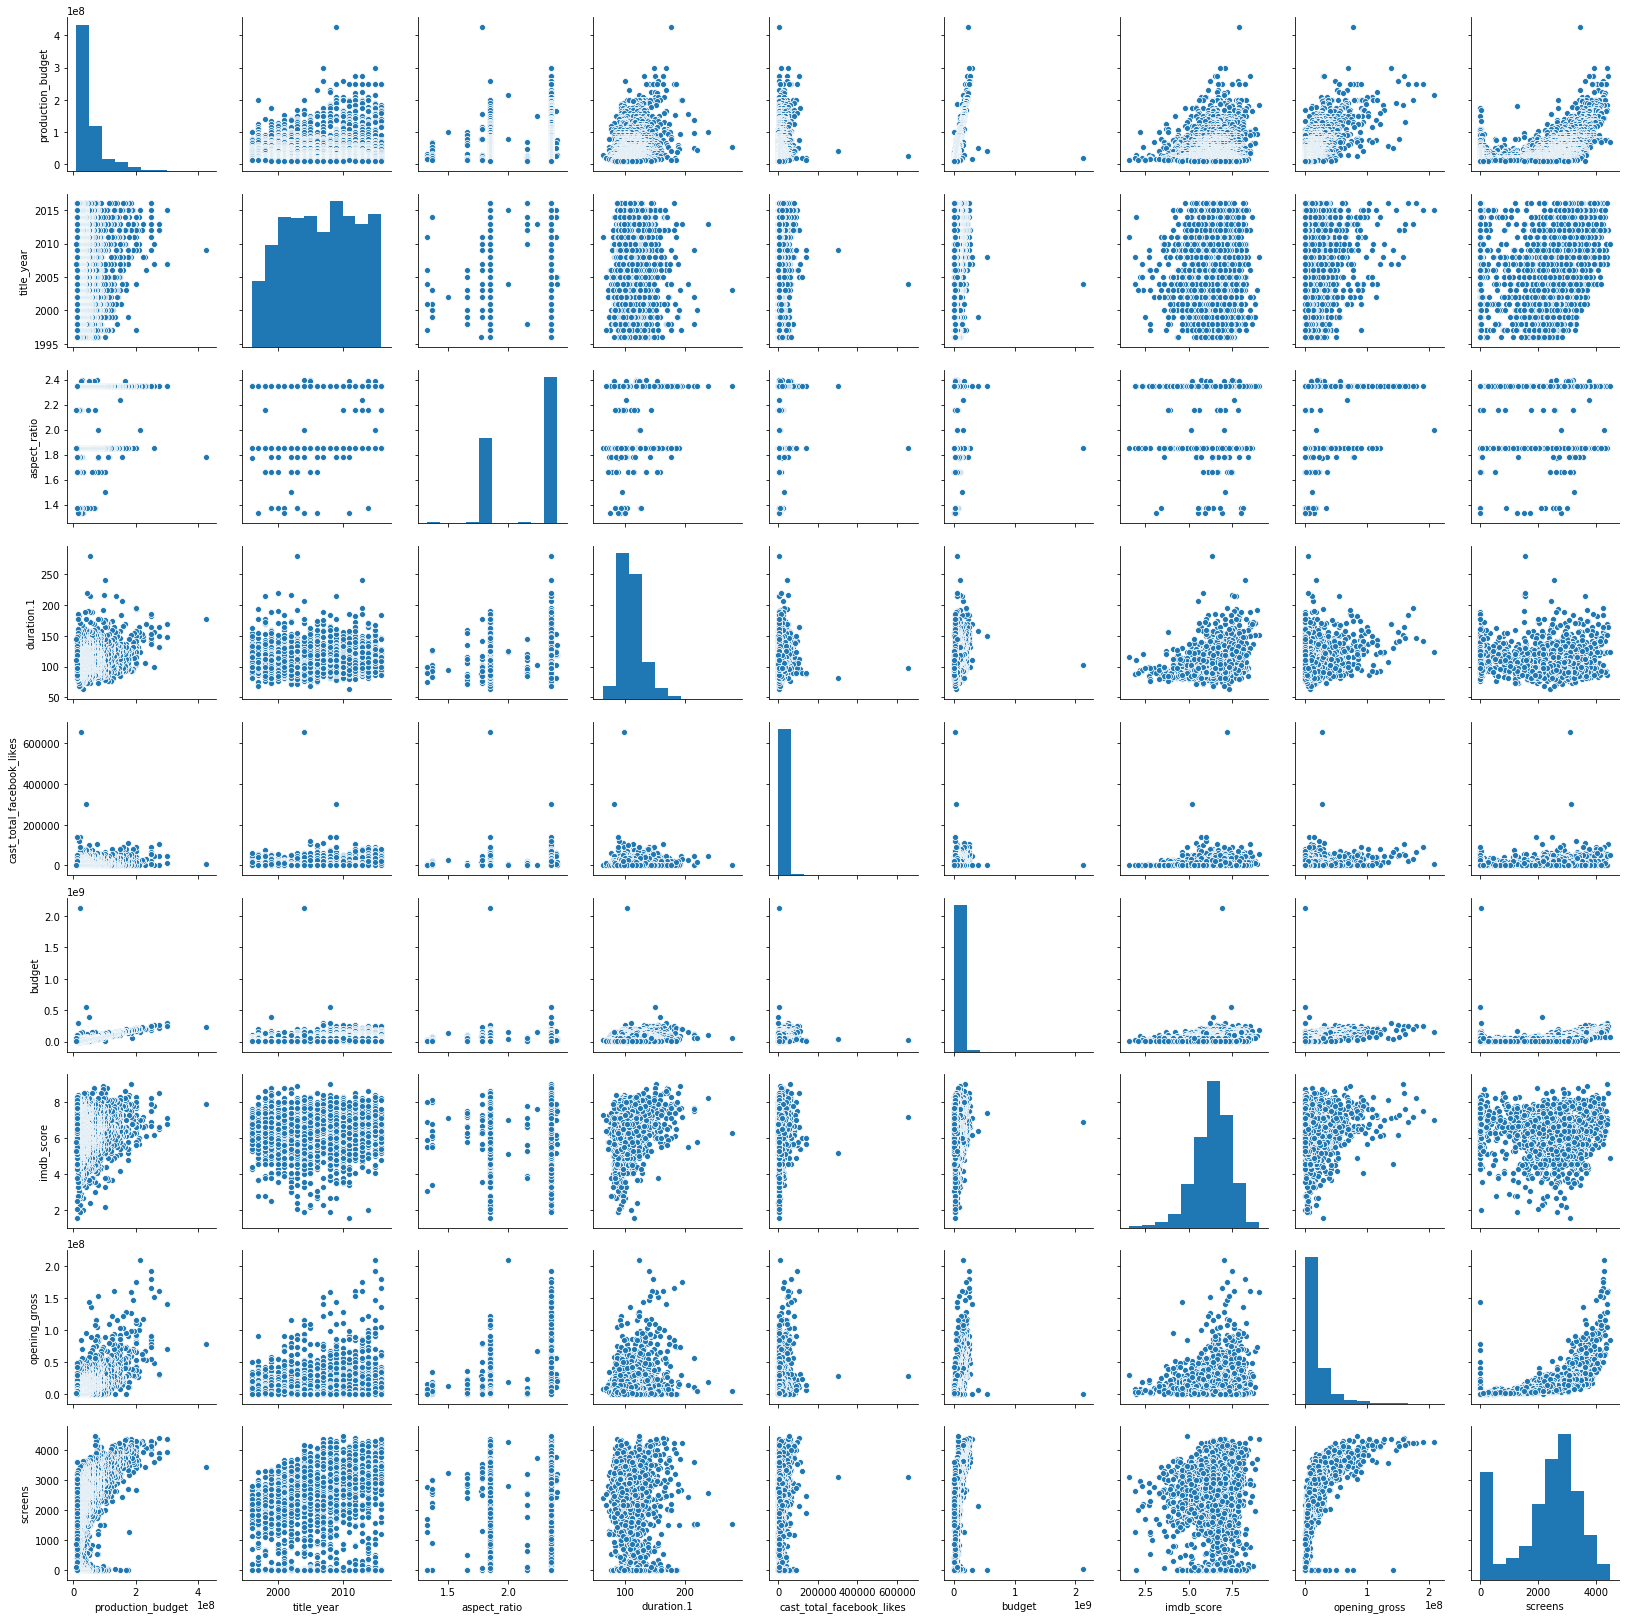

In [268]:
sns.pairplot(X)

In [270]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import Lasso

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
model = Lasso().fit(X_train, y_train).score(X_test, y_test)
model

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4528531114939167e+18, tolerance: 7479170615554818.0
  positive)


0.7926190294963359

In [274]:
model = Lasso()
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [275]:
model.coef_

array([ 1.90801403e+00,  3.03643583e+05, -3.46805336e+07,  1.55151474e+05,
       -1.13959564e+02, -3.22418379e-01,  2.34620349e+07,  5.61238227e+00,
       -1.72993476e+04])

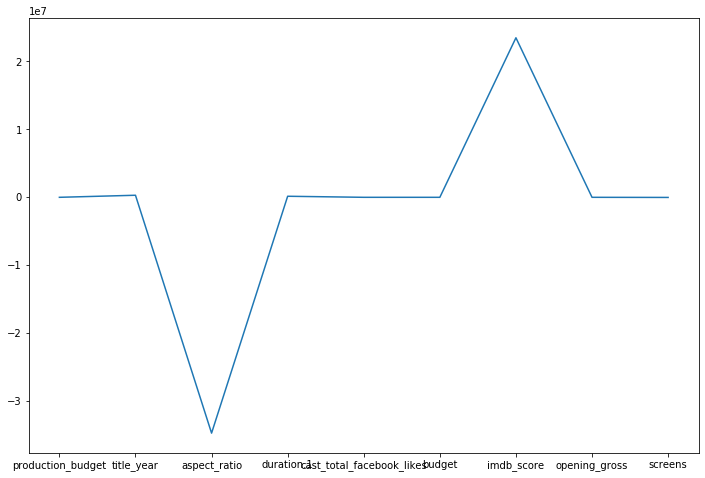

In [283]:
plt.plot(model.coef_)
plt.xticks(np.arange(9),list(X.columns));

In [284]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [285]:
selector = SelectKBest(mutual_info_regression, k= 4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x00000157A45373A8>)

In [286]:
selector.scores_

array([0.32225511, 0.04107269, 0.        , 0.06218443, 0.06684662,
       0.32402031, 0.07368196, 0.8841619 , 0.46310033])

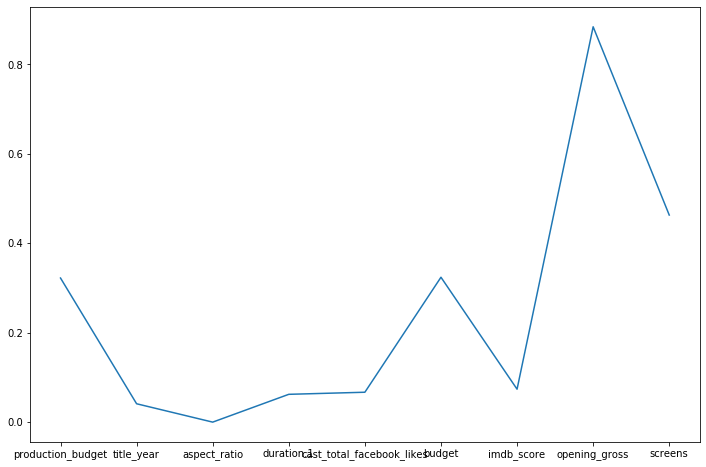

In [293]:
plt.plot(selector.scores_)
plt.xticks(ticks=np.arange(9), labels=list(X.columns));

In [301]:
X2 =  X[['opening_gross', 'screens', 'production_budget']]

In [299]:
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size= 0.25, random_state=1)
model2 = Lasso()
model2.fit(X_train2, y_train).score(X_test2, y_test)

0.7450836527123214

In [302]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [303]:
X_scl = StandardScaler().fit_transform(X)

In [304]:
X_train3, X_test3, y_train, y_test = train_test_split(X_scl, y, test_size= 0.25, random_state=1)
model_scl = Lasso()
model_scl.fit(X_train3, y_train).score(X_test3, y_test)

0.7926190303425178

In [312]:
X_poly_trans = PolynomialFeatures().fit_transform(X)

In [313]:
X_poly_trans.shape

(2221, 55)

In [356]:
X_train4, X_test4, y_train, y_test = train_test_split(X_poly_trans, y, test_size= 0.25, random_state=1)
model_poly = Lasso()
model_poly.fit(X_train4, y_train).score(X_test4, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.369119886881583e+18, tolerance: 7479170615554818.0
  positive)


0.7849702943027482

In [319]:
cross = cross_validate(Lasso(), X, y, return_train_score= True, cv= 5)
cross

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3531444112586967e+18, tolerance: 8334877530886788.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


{'fit_time': array([0.0039897 , 0.03142428, 0.03490615, 0.03191519, 0.0259304 ]),
 'score_time': array([0.00099707, 0.00099707, 0.00099778, 0.00099683, 0.00099778]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [320]:
train_score = cross['train_score']
test_score = cross['test_score']

In [324]:
train_score.mean(), test_score.mean()

(0.7491178363039036, 0.44964021745791777)

In [325]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [326]:
def cross_algoritm(X, y):
    models = [DecisionTreeRegressor(), SVR(), KNeighborsRegressor(), RandomForestRegressor(), Lasso()]
    for model in models:
        results = cross_validate(model, X, y, cv=5, return_train_score=True)
        train_score = np.mean(results['train_score'])
        test_score = np.mean(results['test_score'])
        print(f'{model}, train_score = {train_score}, test_score = {test_score}')

In [327]:
cross_algoritm(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'), train_score = 1.0, test_score = 0.10261998124433443


C:\Users\luife\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False), train_score = -0.11281169421238495, test_score = -0.4750071005563079
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'), train_score = 0.7718842060773927, test_score = 0.3161450871488181


C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), train_score = 0.9583581261829888, test_score = 0.48268525257839145
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False), train_score = 0.7491178363039036, test_score = 0.44964021745791777


C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6937642436249027e+18, tolerance: 8653617519237807.0
  positive)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.366305050945958e+18, tolerance: 8543073557124824.0
  positive)


In [328]:
RandomForestRegressor().fit(X_train, y_train).score(X_test, y_test)

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7710060821629339

In [329]:
cross = cross_validate(RandomForestRegressor(), X, y, return_train_score= True, cv= 5)
train_score = cross['train_score']
test_score = cross['test_score']
train_score.mean(), test_score.mean()

C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\luife\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

(0.9516241722782472, 0.45173262943722003)

In [330]:
from sklearn.model_selection import validation_curve, learning_curve

In [336]:
n = np.arange(1, 500, 20)
train_score, test_score = validation_curve(RandomForestRegressor(), X, y,
                param_name = 'n_estimators',
                param_range = n,
                cv=5)

In [338]:
train_score.shape

(25, 5)

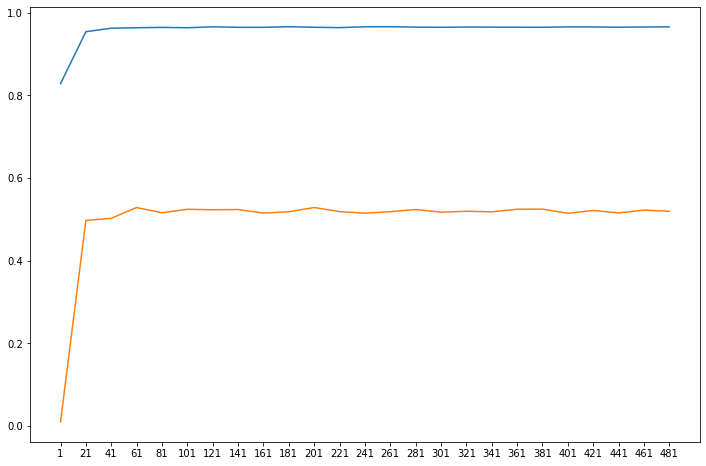

In [348]:
plt.plot(np.mean(train_score, axis=1))
plt.plot(np.mean(test_score, axis=1))
plt.xticks(np.arange(25), n);

In [351]:
samples, train, test = learning_curve(RandomForestRegressor(n_estimators=65), X, y, cv=5)

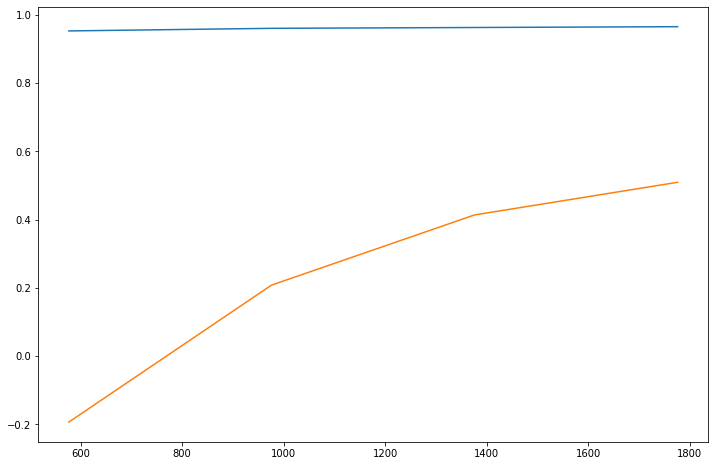

In [354]:
plt.plot(samples[1:], np.mean(train, axis=1)[1:])
plt.plot(samples[1:], np.mean(test, axis=1)[1:])

In [357]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [358]:
GradientBoostingRegressor().fit(X_train, y_train).score(X_test, y_test)

0.7780560504726491

In [361]:
ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, X, y, cv=5, return_train_score=True, scoring='r2')

train = np.mean(results['train_score'])
test = np.mean(results['test_score'])

train, test

(0.9151392143549633, 0.5229501066114953)

In [362]:
estimator = GradientBoostingRegressor(learning_rate = 0.1,
                                      min_samples_split= 500, 
                                      min_samples_leaf= 50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)

In [363]:
params = {'n_estimators': range(20, 501, 20)}

In [364]:
grid = GridSearchCV(estimator,
                   param_grid = params,
                   scoring = 'r2',
                   cv = 5)

In [371]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [372]:
grid.best_params_

{'n_estimators': 240}

In [373]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [374]:
grid.best_score_

0.7553059694284987

In [376]:
results = cross_validate(grid.best_estimator_, X_train, y_train, cv=5, return_train_score=True, scoring='r2')

train = np.mean(results['train_score'])
test = np.mean(results['test_score'])

train, test

(0.8286608694466742, 0.7553059694284988)

In [377]:
grid.best_estimator_.fit(X_train, y_train).score(X_test, y_test)

0.8092888852563106

In [378]:
pred = grid.best_estimator_.predict(X_test)

In [380]:
from sklearn.metrics import mean_squared_error

In [381]:
error = np.sqrt(mean_squared_error(y_test, pred))

In [382]:
error

74026845.41711648

In [383]:
y.mean()

137922363.238181

In [384]:
y.std()

202301069.58338928

{'whiskers': [<matplotlib.lines.Line2D at 0x157c24c1508>,
 'caps': [<matplotlib.lines.Line2D at 0x157c24c1f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x157c1ef4d48>],
 'medians': [<matplotlib.lines.Line2D at 0x157c24c1708>],
 'fliers': [<matplotlib.lines.Line2D at 0x157c24c9f08>],
 'means': []}

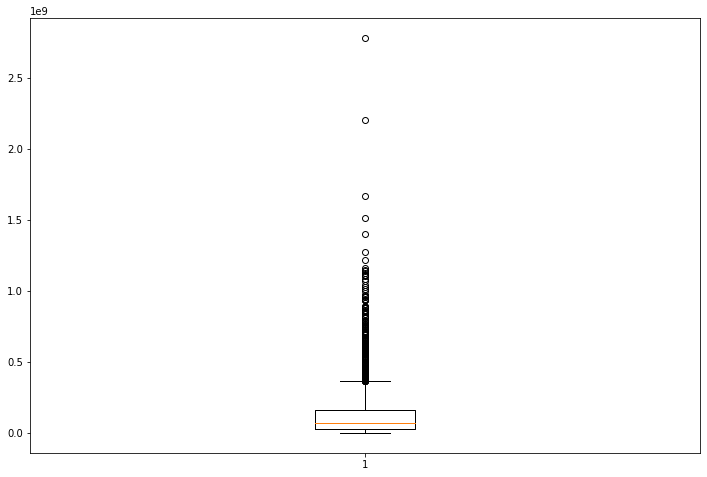

In [385]:
plt.boxplot(y)

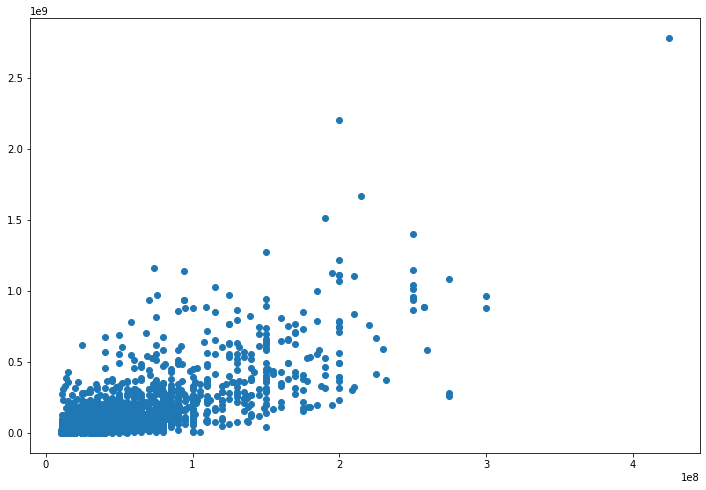

In [400]:
plt.scatter(X['production_budget'],y)

(0, 1000000000)

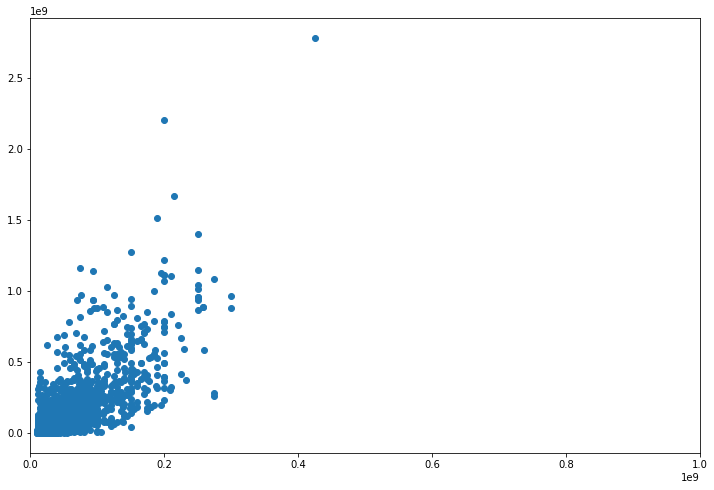

In [403]:
plt.scatter(X['production_budget'],y)
plt.xlim(0,1000000000)

In [407]:
df[X['production_budget'] < 1e9].corr()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
production_budget,1.000000,0.733616,0.152893,0.161617,0.324854,0.185496,0.651859,0.145927,0.676427,0.512074
worldwide_gross,0.733616,1.000000,0.168501,0.078240,0.293716,0.177957,0.476828,0.278984,0.823953,0.446747
title_year,0.152893,0.168501,1.000000,0.198549,0.015875,0.092639,0.088555,0.085859,0.188318,0.197856
aspect_ratio,0.161617,0.078240,0.198549,1.000000,0.233712,0.060679,0.095400,0.133128,0.092245,0.074468
duration.1,0.324854,0.293716,0.015875,0.233712,1.000000,0.116032,0.220324,0.423912,0.211861,-0.044377
cast_total_facebook_likes,0.185496,0.177957,0.092639,0.060679,0.116032,1.000000,0.116032,0.137695,0.204122,0.125018
budget,0.651859,0.476828,0.088555,0.095400,0.220324,0.116032,1.000000,0.109624,0.446085,0.306713
imdb_score,0.145927,0.278984,0.085859,0.133128,0.423912,0.137695,0.109624,1.000000,0.146310,-0.149424
opening_gross,0.676427,0.823953,0.188318,0.092245,0.211861,0.204122,0.446085,0.146310,1.000000,0.606952
screens,0.512074,0.446747,0.197856,0.074468,-0.044377,0.125018,0.306713,-0.149424,0.606952,1.000000


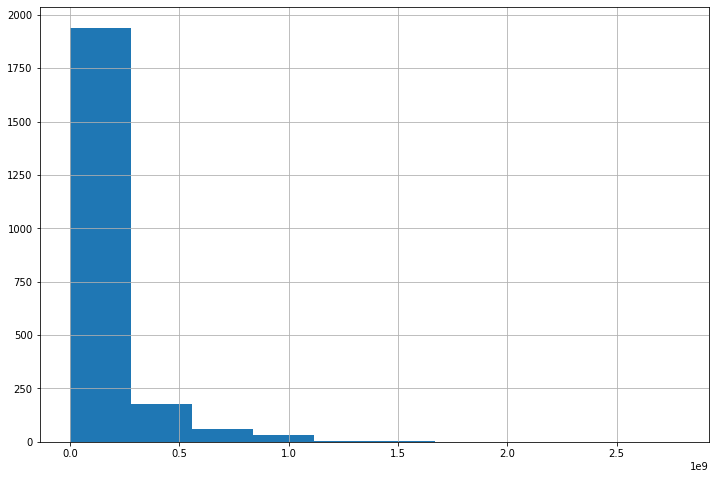

In [408]:
y.hist()